# PARAMETERS AND IMPORTS

In [231]:
%load_ext kedro.ipython
%reload_kedro
context.catalog.list()

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


[09/15/24 11:51:30] INFO     Resolved project path as:                                              ]8;id=815929;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=987617;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#171\171]8;;\
                             C:\Users\PC\Desktop\PRO-G\ECOLE\DSTI_goodreads\goodreads-predictor.                   
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/15/24 11:51:31] INFO     Kedro project goodreads-predictor                                      ]8;id=994177;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=592724;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=816012;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=567250;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=632335;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=121103;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#148\148]8;;\


[
    'books_raw',
    'books_loaded',
    'publisher_consolidation',
    'price_by_isbn_input',
    'price_by_isbn',
    'book_genres',
    'title_embeddings_original',
    'authors_embeddings',
    'description_embeddings',
    'open_library_book_api_info_input',
    'open_library_book_api_info',
    'filtered_books',
    'exclusions_summary',
    'scope_waterfall_plot',
    'books_features',
    'feature_cutoffs',
    'factor_lumper',
    'model_train',
    'model_valid',
    'model_test',
    'flaml_model_trained',
    'flaml_model_test_results',
    'flaml_regressor_scatterplot',
    'all_model_results',
    'parameters',
    'params:author_book_count_bin_min_vals',
    'params:color_gr_brown',
    'params:color_gr_purple',
    'params:color_gr_green',
    'params:color_gr_tan_background',
    'params:coolors_dark_green',
    'params:coolors_blue',
    'params:coolors_dark_cyan',
    'params:coolors_orange',
    'params:coolors_yellow',
    'params:target_col',
    'params:thresh

In [232]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from goodreads_predictor.pipelines.model_data_creation.nodes import create_train_test_split, create_factor_lumper, apply_factor_lumping
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from flaml import AutoML

# DATA MANIPULATION

In [233]:
df = catalog.load('books_features')

                    INFO     Loading data from books_features (ParquetDataset)...               ]8;id=477118;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=886643;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

In [234]:
df

,title,isbn,isbn13_x,most_common_author,average_rating,num_pages,ratings_count,text_reviews_count,publisher,Price,...,cluster,UMAP1,UMAP2,text_reviews_percentage,AuthorFameLevel,book_count_category,publisher_book_count_category,PublisherPriceCategory,book_length_category,engagement_level
0,said the shotgun to the head.,0743470796,9780743470797,Saul Williams,4.220000,192.000000,2762,214,MTV Books,14.000,...,5,14.060379,1.496109,0.077480,4 - Popular,1 - Few Books Written,1 - Few Books Published,1 - Low Price Publisher,1 - Short Stories (1-271 pages),3 - Engaged Reviewes
1,$30 Film School: How to Write Direct Produce...,1592000673,9781592000678,Michael W. Dean,3.490000,528.000000,30,4,Cengage Learning,30.000,...,3,9.052225,6.735559,0.133333,1 - Very Low Exposure,1 - Few Books Written,1 - Few Books Published,2 - High Price Publisher,3 - Long Books (525 - 1049 pages),4 - Highly Engaged Reviewers
2,'Salem's Lot,0385516487,9780385516488,Stephen King,4.246005,474.333333,85610,799,Doubleday,33.670,...,0,12.680984,-2.407298,0.009333,6 - Famous,3 - Many Books Written,2 - Some Books Published,2 - High Price Publisher,2 - Standard Books (272-524 pages),1 - Passive Reviewers
3,1 000 Places to See Before You Die,0761104844,9780761104841,Patricia Schultz,3.850000,992.000000,36303,439,Workman Publishing Company,19.950,...,3,11.028986,6.481936,0.012093,5 - Semi-Famous,1 - Few Books Written,2 - Some Books Published,1 - Low Price Publisher,3 - Long Books (525 - 1049 pages),1 - Passive Reviewers
4,10 lb Penalty,042519745X,9780425197455,Dick Francis,3.900000,320.000000,3490,177,G.P. Putnam's Sons,8.990,...,7,8.010313,9.247348,0.050716,5 - Semi-Famous,3 - Many Books Written,3 - Many Books Published,1 - Low Price Publisher,2 - Standard Books (272-524 pages),2 - Standard Reviewers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8379,À tout jamais,2266111108,9782266111102,Nicholas Sparks,4.170000,214.000000,186,22,Pocket,36.370,...,1,10.034228,10.663538,0.118280,6 - Famous,3 - Many Books Written,2 - Some Books Published,1 - Low Price Publisher,1 - Short Stories (1-271 pages),4 - Highly Engaged Reviewers
8380,Ángeles y demonios (Robert Langdon #1),849561877X,9788495618771,Dan Brown,3.890000,508.000000,196,20,Umbriel,41.225,...,8,11.563412,1.433100,0.102041,6 - Famous,3 - Many Books Written,1 - Few Books Published,2 - High Price Publisher,2 - Standard Books (272-524 pages),4 - Highly Engaged Reviewers
8381,Мастер и Маргарита,5040019521,9785040019526,Mikhail Bulgakov,4.300000,640.000000,10,1,Эксмо,-999.000,...,8,14.088162,2.859336,0.100000,3 - Well-Known,1 - Few Books Written,1 - Few Books Published,Unknown,3 - Long Books (525 - 1049 pages),4 - Highly Engaged Reviewers
8382,犬夜叉 1,409125201X,9784091252012,Rumiko Takahashi,4.270000,192.000000,41,3,小学館,3.730,...,9,10.230361,13.722033,0.073171,5 - Semi-Famous,3 - Many Books Written,1 - Few Books Published,1 - Low Price Publisher,1 - Short Stories (1-271 pages),3 - Engaged Reviewes


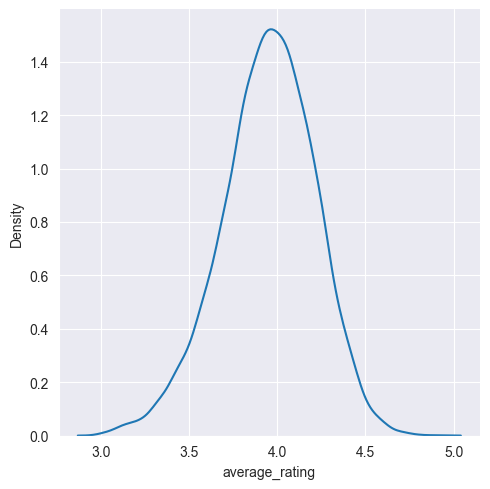

In [235]:
# Visualize quantile of average_rating column
sns.set_style('darkgrid')
sns.displot(data=df, x='average_rating', kind='kde')
plt.show()


# TRANSFORMING TO CLASSIFICATION

In [236]:
# Compute quartiles of df.average_rating
quartiles = df.average_rating.quantile([0.25, 0.5, 0.75])
quartiles



0.25    3.78
0.50    3.96
0.75    4.13
Name: average_rating, dtype: float64

In [237]:
# Use quartiles as compasses to convert the continuous variable to a categorical one using custom bins
# Create a new column with the categorical variable using thresholds

df['rating_cat'] = pd.cut(df['average_rating'], 
                          bins=[-float('inf'), 3.78,float('inf')], 
                          labels=[0, 1])




In [238]:
df

,title,isbn,isbn13_x,most_common_author,average_rating,num_pages,ratings_count,text_reviews_count,publisher,Price,...,UMAP1,UMAP2,text_reviews_percentage,AuthorFameLevel,book_count_category,publisher_book_count_category,PublisherPriceCategory,book_length_category,engagement_level,rating_cat
0,said the shotgun to the head.,0743470796,9780743470797,Saul Williams,4.220000,192.000000,2762,214,MTV Books,14.000,...,14.060379,1.496109,0.077480,4 - Popular,1 - Few Books Written,1 - Few Books Published,1 - Low Price Publisher,1 - Short Stories (1-271 pages),3 - Engaged Reviewes,1
1,$30 Film School: How to Write Direct Produce...,1592000673,9781592000678,Michael W. Dean,3.490000,528.000000,30,4,Cengage Learning,30.000,...,9.052225,6.735559,0.133333,1 - Very Low Exposure,1 - Few Books Written,1 - Few Books Published,2 - High Price Publisher,3 - Long Books (525 - 1049 pages),4 - Highly Engaged Reviewers,0
2,'Salem's Lot,0385516487,9780385516488,Stephen King,4.246005,474.333333,85610,799,Doubleday,33.670,...,12.680984,-2.407298,0.009333,6 - Famous,3 - Many Books Written,2 - Some Books Published,2 - High Price Publisher,2 - Standard Books (272-524 pages),1 - Passive Reviewers,1
3,1 000 Places to See Before You Die,0761104844,9780761104841,Patricia Schultz,3.850000,992.000000,36303,439,Workman Publishing Company,19.950,...,11.028986,6.481936,0.012093,5 - Semi-Famous,1 - Few Books Written,2 - Some Books Published,1 - Low Price Publisher,3 - Long Books (525 - 1049 pages),1 - Passive Reviewers,1
4,10 lb Penalty,042519745X,9780425197455,Dick Francis,3.900000,320.000000,3490,177,G.P. Putnam's Sons,8.990,...,8.010313,9.247348,0.050716,5 - Semi-Famous,3 - Many Books Written,3 - Many Books Published,1 - Low Price Publisher,2 - Standard Books (272-524 pages),2 - Standard Reviewers,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8379,À tout jamais,2266111108,9782266111102,Nicholas Sparks,4.170000,214.000000,186,22,Pocket,36.370,...,10.034228,10.663538,0.118280,6 - Famous,3 - Many Books Written,2 - Some Books Published,1 - Low Price Publisher,1 - Short Stories (1-271 pages),4 - Highly Engaged Reviewers,1
8380,Ángeles y demonios (Robert Langdon #1),849561877X,9788495618771,Dan Brown,3.890000,508.000000,196,20,Umbriel,41.225,...,11.563412,1.433100,0.102041,6 - Famous,3 - Many Books Written,1 - Few Books Published,2 - High Price Publisher,2 - Standard Books (272-524 pages),4 - Highly Engaged Reviewers,1
8381,Мастер и Маргарита,5040019521,9785040019526,Mikhail Bulgakov,4.300000,640.000000,10,1,Эксмо,-999.000,...,14.088162,2.859336,0.100000,3 - Well-Known,1 - Few Books Written,1 - Few Books Published,Unknown,3 - Long Books (525 - 1049 pages),4 - Highly Engaged Reviewers,1
8382,犬夜叉 1,409125201X,9784091252012,Rumiko Takahashi,4.270000,192.000000,41,3,小学館,3.730,...,10.230361,13.722033,0.073171,5 - Semi-Famous,3 - Many Books Written,1 - Few Books Published,1 - Low Price Publisher,1 - Short Stories (1-271 pages),3 - Engaged Reviewes,1


In [239]:
# Drop the 'average_rating' column
df = df.drop('average_rating', axis=1)

# TRAIN TEST SPLIT

In [240]:
train, valid, test = create_train_test_split(df,target_col='rating_cat',test_size=0.2)


In [241]:
factor_lumper = create_factor_lumper(threshold=30, is_top_n=False, is_percentage=False)


In [242]:
train, valid, test, fitted_factor_lumper = apply_factor_lumping(train_data=train, valid_data=valid, test_data=test, factor_lumper=factor_lumper)


In [243]:
# Function to clean the three splits
def clean_data(data):
    # Remove UMAP1 and UMAP2 columns
    data = data.drop(['UMAP1', 'UMAP2'], axis=1)
    # Remove the title column
    data = data.drop(['title'], axis=1)
    return data

In [244]:
train = clean_data(train)
test = clean_data(test)
valid = clean_data(valid)

In [245]:
train

,isbn,most_common_author,publisher,language_code,Description,genre,AuthorFameLevel,book_count_category,publisher_book_count_category,PublisherPriceCategory,...,num_pages,ratings_count,text_reviews_count,Price,DescriptionISBN,isbn13_y,cluster,text_reviews_percentage,rating_cat,stratify_col
0,other,other,other,eng,other,fiction,4 - popular,1 - few books written,1 - few books published,1 - low price publisher,...,304.0,2623,131,16.00,9780345486479,9780345486479,0,0.049943,1,1
1,other,other,other,eng,other,"history, historical fiction, biography",1 - very low exposure,1 - few books written,1 - few books published,2 - high price publisher,...,312.0,51,10,24.95,9780865652422,9780865652422,3,0.196078,0,0
2,other,other,other,eng,other,"fantasy, paranormal",5 - semi-famous,3 - many books written,3 - many books published,1 - low price publisher,...,340.0,152,4,6.99,9780786929207,9780786929207,7,0.026316,0,0
3,other,other,other,eng,other,fiction,6 - famous,2 - some books written,3 - many books published,1 - low price publisher,...,376.0,269843,5384,17.00,9780743418171,9780743418171,0,0.019952,0,0
4,other,other,other,eng,other,"history, historical fiction, biography",2 - not well-known,1 - few books written,1 - few books published,1 - low price publisher,...,138.0,42,4,14.95,9780156075008,9780156075008,2,0.095238,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6702,other,other,puffin books,eng,other,children,5 - semi-famous,3 - many books written,3 - many books published,1 - low price publisher,...,32.0,830,41,2.45,9780140503449,9780140503449,0,0.049398,1,1
6703,other,other,scribner,eng,other,"mystery, thriller, crime",5 - semi-famous,3 - many books written,3 - many books published,2 - high price publisher,...,261.0,4844,433,22.00,9781416535522,9781416535522,0,0.089389,0,0
6704,other,other,other,other,other,fiction,6 - famous,3 - many books written,1 - few books published,1 - low price publisher,...,123.0,27,1,2.96,9783499158476,9783499158476,7,0.037037,0,0
6705,other,other,anchor books,eng,other,fiction,5 - semi-famous,2 - some books written,3 - many books published,1 - low price publisher,...,328.0,63595,1222,16.95,9780385265706,9780385265706,0,0.019215,1,1


In [246]:
train.columns


Index(['isbn', 'most_common_author', 'publisher', 'language_code',
       'Description', 'genre', 'AuthorFameLevel', 'book_count_category',
       'publisher_book_count_category', 'PublisherPriceCategory',
       'book_length_category', 'engagement_level', 'isbn13_x', 'num_pages',
       'ratings_count', 'text_reviews_count', 'Price', 'DescriptionISBN',
       'isbn13_y', 'cluster', 'text_reviews_percentage', 'rating_cat',
       'stratify_col'],
      dtype='object')

# FEATURE SELECTION 

In [247]:
# Feature selection for all Xs

FEATURES = ['most_common_author', 'publisher', 'language_code', 'genre', 'AuthorFameLevel', 'book_count_category', 'publisher_book_count_category', 'PublisherPriceCategory', 'book_length_category', 'engagement_level','ratings_count', 'Price', 'cluster', 'text_reviews_percentage' ]
TARGET = ['rating_cat']

# Define function to encode categorical variables from X
def encode_categorical_variables(X):
    # Create a copy of the input DataFrame
    X_encoded = X.copy()
    # Encode categorical variables using LabelEncoder
    for col in X_encoded.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])
    return X_encoded

In [248]:
X_train = train[FEATURES]
X_test = test[FEATURES]
X_valid = valid[FEATURES]

y_train = train[TARGET]
y_test = test[TARGET]
y_valid = valid[TARGET]

In [249]:
X_train_encoded = encode_categorical_variables(X_train)
X_test_encoded = encode_categorical_variables(X_test)
X_valid_encoded = encode_categorical_variables(X_valid)

In [250]:
X_train_encoded

,most_common_author,publisher,language_code,genre,AuthorFameLevel,book_count_category,publisher_book_count_category,PublisherPriceCategory,book_length_category,engagement_level,ratings_count,Price,cluster,text_reviews_percentage
0,3,20,0,3,3,0,0,0,1,1,2623,16.00,0,0.049943
1,3,20,0,4,0,0,0,1,1,3,51,24.95,3,0.196078
2,3,20,0,2,4,2,2,0,1,0,152,6.99,7,0.026316
3,3,20,0,3,5,1,2,0,1,0,269843,17.00,0,0.019952
4,3,20,0,4,1,0,0,0,0,2,42,14.95,2,0.095238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6702,3,27,0,0,4,2,2,0,0,1,830,2.45,0,0.049398
6703,3,29,0,5,4,2,2,1,0,2,4844,22.00,0,0.089389
6704,3,20,2,3,5,2,0,0,0,1,27,2.96,7,0.037037
6705,3,1,0,3,4,1,2,0,1,0,63595,16.95,0,0.019215


In [251]:
y_train

,rating_cat
0,1
1,0
2,0
3,0
4,1
...,...
6702,1
6703,0
6704,0
6705,1


# MODEL 1 - SGD CLASSIFIER

In [252]:
# Use SGDClassifier to train a classification model
sgd_model = SGDClassifier(loss='perceptron', random_state=42)
sgd_model.fit(X_train_encoded, y_train.values.ravel())
# Make predictions on the test set
y_pred = sgd_model.predict(X_test_encoded)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.733890214797136
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.12      0.18       210
           1       0.76      0.94      0.84       628

    accuracy                           0.73       838
   macro avg       0.58      0.53      0.51       838
weighted avg       0.67      0.73      0.68       838



In [253]:
confusion = confusion_matrix(y_test, y_pred)

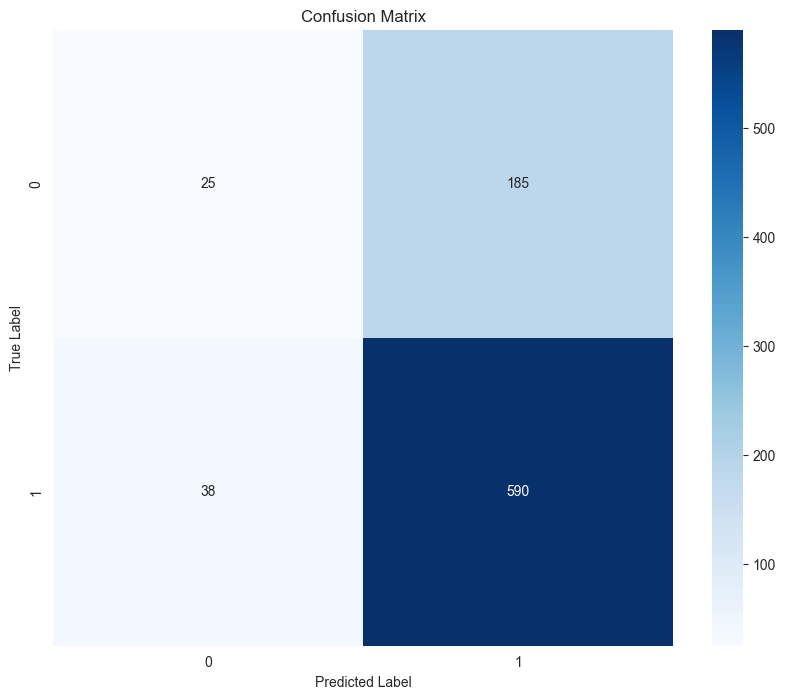

In [254]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [259]:
y_train.values.ravel()

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

# AUTO ML MODEL SELECTION

In [260]:
# Use automl to find the best model
automl=AutoML()

automl_settings = {
    "time_budget": 60, # total running time in seconds
    "metric": 'roc_auc', 
    "task": 'classification', # task type
    "log_file_name": 'automl.log', # flaml log file
    "log_training_metric": True, # whether to log training metric
    "n_jobs": 4,
    "seed": 7654321,


}

automl.fit(X_train=X_train_encoded, y_train=y_train.values.ravel(), **automl_settings)



[flaml.automl.logger: 09-15 11:52:53] {1680} INFO - task = classification
[flaml.automl.logger: 09-15 11:52:53] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 09-15 11:52:53] {1789} INFO - Minimizing error metric: 1-roc_auc
[flaml.automl.logger: 09-15 11:52:53] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 09-15 11:52:53] {2219} INFO - iteration 0, current learner lgbm


[flaml.automl.logger: 09-15 11:52:54] {2345} INFO - Estimated sufficient time budget=4973s. Estimated necessary time budget=115s.
[flaml.automl.logger: 09-15 11:52:54] {2392} INFO -  at 0.5s,	estimator lgbm's best error=0.3355,	best estimator lgbm's best error=0.3355
[flaml.automl.logger: 09-15 11:52:54] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 09-15 11:52:54] {2392} INFO -  at 1.0s,	estimator lgbm's best error=0.3350,	best estimator lgbm's best error=0.3350
[flaml.automl.logger: 09-15 11:52:54] {2219} INFO - iteration 2, current learner lgbm
[flaml.automl.logger: 09-15 11:52:56] {2392} INFO -  at 2.5s,	estimator lgbm's best error=0.2894,	best estimator lgbm's best error=0.2894
[flaml.automl.logger: 09-15 11:52:56] {2219} INFO - iteration 3, current learner xgboost
[flaml.automl.logger: 09-15 11:52:56] {2392} INFO -  at 3.0s,	estimator xgboost's best error=0.3378,	best estimator lgbm's best error=0.2894
[flaml.automl.logger: 09-15 11:52:56] {2219} INFO - it

In [261]:
print(automl.best_estimator)
automl.best_config

lgbm



{
    'n_estimators': 23,
    'num_leaves': 17,
    'min_child_samples': 19,
    'learning_rate': 0.1410934390479033,
    'log_max_bin': 9,
    'colsample_bytree': 0.8801327898366843,
    'reg_alpha': 0.004475520554844502,
    'reg_lambda': 0.09986161193248329
}

In [262]:
automl.score(X_train_encoded, y_train)

0.7802296108543313

In [264]:
automl.score(X_test_encoded, y_test)

0.7446300715990454

In [265]:
y_pred_xg = automl.predict(X_test_encoded)

In [266]:
# Visualization of classification report
report = classification_report(y_test, y_pred_xg, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.464286,0.123810,0.195489,210.00000
1,0.764706,0.952229,0.848227,628.00000
accuracy,0.744630,0.744630,0.744630,0.74463
macro avg,0.614496,0.538019,0.521858,838.00000
weighted avg,0.689422,0.744630,0.684653,838.00000


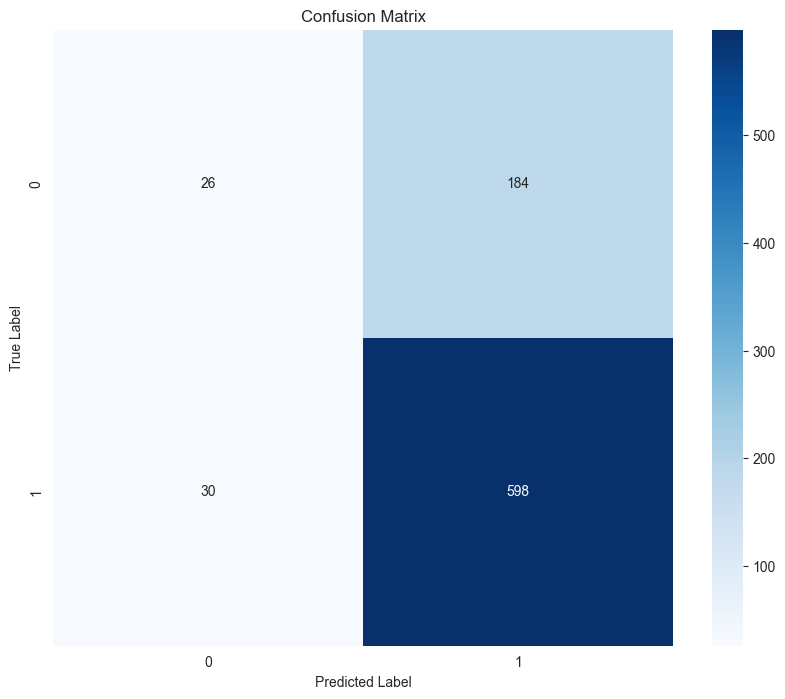

In [267]:
cm = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()